# SI 370 - Hypothesis testing (t-test and ANOVA)

Today's class will focus on two common statistical techniques used to investigate
hypotheses about the mean values within samples.  We'll spend most of our time 
focusing on ANOVA, as that seems to be scarier than the more familiar t-test.

We will be using two datasets: a simple on about pizza dough recipes and 
a more complex one drawn from a FiveThirtyEight example about biographical films.

We'll start by importing the usual suspects (including scipy, which we haven't used
much so far):

In [1]:
import numpy as np
import pandas as pd
import scipy

And we'll also import the main packages that we'll be using for our statistical analyses:

In [2]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Part I: Pizza Dough Recipes

https://dasl.datadescription.com/datafile/activating-baking-yeast/?_sfm_methods=Analysis+of+Variance&_sfm_cases=4+59943

To shorten the time it takes him to
make his favorite pizza, a student designed an experiment to
test the effect of sugar and milk on the activation times for
baking yeast. Specifically, he tested four different recipes and
measured how many seconds it took for the same amount of
dough to rise to the top of a bowl. He randomized the order
of the recipes and replicated each treatment 4 times.

### Q1: Go ahead and read in the data/activating-baking-yeast.txt file into a DataFrame called ```yeast```

In [5]:
# insert your code here
yeast = pd.read_csv('data/activating-baking-yeast.txt', sep='\t')

### End Q1

As usual, inspect the DataFrame so we know what we're dealing with:

In [6]:
yeast.head()

,Activation Times,Recipe
0,575,A
1,395,A
2,280,B
3,120,B
4,720,C


In [7]:
yeast.columns

Index(['Activation Times', 'Recipe '], dtype='object')

Those column names aren't nice to work with, so let's go ahead and rename them
to ```activation``` and ```recipe```

In [8]:
to_be_renamed = {"Activation Times" :"activation", "Recipe ": "recipe"}
yeast = yeast.rename(columns = to_be_renamed)  

In [9]:
yeast.head()

,activation,recipe
0,575,A
1,395,A
2,280,B
3,120,B
4,720,C


Let's start by visually examining our data:

In [10]:
import seaborn as sns

### Q2: Create a boxplot the looks like the following:
![](resources/pizza-boxplot.png)

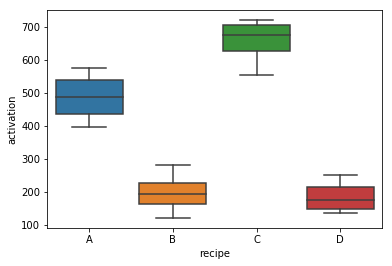

In [11]:
# insert your code here
ax = sns.boxplot(x='recipe', y='activation', data=yeast)

### End Q2

## Let's do an ANOVA!
We want to know if the above differences are statistically "real".  In other words, 
we want to know if the activation times vary according to the recipes.

We use statsmodels.forumula.api to create the model in a "readable" way.  For example, 
```activation ~ recipe``` would do that for us.  So we're going to create a model,
fit it to the data, and examine it.  We'll talk about the "Type 2" bit in class.

In [13]:
yeast_lm = ols('activation ~ recipe', data=yeast).fit()
table = sm.stats.anova_lm(yeast_lm, type=2) # Type 2 ANOVA DataFrame
table

,df,sum_sq,mean_sq,F,PR(>F)
recipe,3.0,638967.6875,212989.229167,44.739175,8.639741e-07
Residual,12.0,57128.2500,4760.687500,NaN,NaN


### Q3: What does that tell us?

Modeling activation in terms of the different recipes (activation as a function of recipe). Tells us the probability that we got these values by chance is up in thet top right corner - there's a really low chance of that happening. There appears to be an affect of recipe on activation time.

In [15]:
yeast_lm.summary()
# the intercept tells us thet effect of our baseline
# this means that our baseline value of recipe a is 486 s (coef)
# the prob of getting this by chance is almost 0, so we are pretty sure of this

# recipe b is 290 seconds lower than the baseline, not thet value -290, more like 486 - 290 ~= 200
# recipe c is 169 above recipe a
# recipe d is 302 below recipe a

# we can see this reflected by where the graphs are in the boxplot

# the [0.025 and 0.975] gives us 95% certainty that the coef is in betwteen those two (2.5% on each side)

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             activation   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     44.74
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           8.64e-07
Time:                        13:06:46   Log-Likelihood:                -88.147
No. Observations:                  16   AIC:                             184.3
Df Residuals:                      12   BIC:                             187.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     486.2500     34.499     14.095      0.000     411.083     561.417
recipe[T.B]  -290.0000     48.789     -5.944      0.000    -396.302    -183.698
recipe[T.C]   169.7500     48.789      3.479      0.005      63.448     276.052
recipe[T.D]  -302.5000     48.789     -6.200      0.000    -408.802    -196.198
==============================================================================
Omnibus:                        1.840   Durbin-Watson:                   3.281
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                0.964
Skew:                          -0.142   Prob(JB):                        0.618
Kurtosis:                       1.832   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### End Q3

## Tukey's Honestly Significant Differences (HSD)

Ok, so we know there are significant differences between the different recipes, but
which one(s) are different from other ones?  To answer that, we can use Tukey's HSD (Honestly Sigificant Differences):

In [16]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [17]:
res2 = pairwise_tukeyhsd(yeast['activation'], yeast['recipe'])
res2.summary()

group1,group2,meandiff,lower,upper,reject
A,B,-290.0,-434.8661,-145.1339,True
A,C,169.75,24.8839,314.6161,True
A,D,-302.5,-447.3661,-157.6339,True
B,C,459.75,314.8839,604.6161,True
B,D,-12.5,-157.3661,132.3661,False
C,D,-472.25,-617.1161,-327.3839,True


### Q3: What does that mean?

We reject the Null hypothesis for group A and B, meaning they are significantly different.

We accept the Null hypothesis for group B and D, meaning they are NOT significantly different.

You can see these by looking at the graph.

### End Q3

For the next section, we draw our inspiration from the FiveThirtyEight article "‘Straight Outta Compton’ Is The Rare Biopic Not About White Dudes" (https://fivethirtyeight.com/features/straight-outta-compton-is-the-rare-biopic-not-about-white-dudes/).  FiveThiryEight has a great habit of publishing the data
that underpin their stories and those data are available via GitHub so it's easy to 
load them into a DataFrame:

In [46]:
biopics = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/biopics/biopics.csv", encoding="latin1")

In [47]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


We're interested in the 'box_office' variable, which is an oddly-formatted representation of the box-office earnings for each movie.  We're going to create a function that 
converts representations like '$56.7M' to '56700000'.  How?

Time for some regular expressions (yay!):

In [48]:
import re

### Q4: Fill in the regular expression
You want to look for a $ sign, followed by at least one number, followed optionally by a dot (".") and one or more additional numbers, followed optionally by a "K" or an "M".  You want the numerical part as group #1, and the
"K" or "M" part as group #2.  

In the unit test below, the return value of "$537K" should be 537000.

Documentation is at https://docs.python.org/3/library/re.html (that's FYI only -- you 
won't have time to read this during class).

In [54]:
def box_office_dollars(earnings):
    m = re.match(r'\$?([0-9.]+)([KM]?)',earnings)
    # \$ explicit dollar sign
    # ([0-9.]+) any number of numbers or dots
    # ([KM]?) either a K or a M
    if not m:
        return np.NaN
    ret = m.group(1)
    if not ret:
        return np.NaN
    try:
        ret = float(ret)
    except:
        return np.NaN
    if m.group(2) == 'M':
        return ret * 1000000
    if m.group(2) == 'K':
        return ret * 1000
    return ret

# Test out our function, which should print 537000.0 given $537K
box_office_dollars("$10")

10.0

### End Q4

Let's drop our missing values:

In [55]:
biopics = biopics.dropna()

And apply it to our DataFrame, creating a new column called 'box_office_dollars'

In [56]:
biopics['box_office_dollars'] = biopics['box_office'].apply(box_office_dollars)

In [57]:
# biopics = biopics.dropna()

As always, let's take a look at the distribution of our variable:


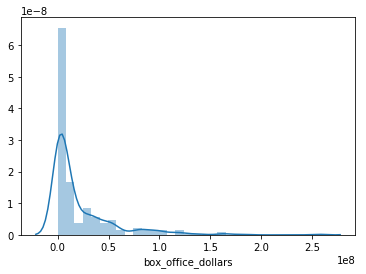

In [58]:
sns.distplot(biopics['box_office_dollars'])

Hmmmm.  That doesn't look good (why?) . 

Let's see if we can make that look a bit more like a normal distribution.  Let's 
apply a log transform:

In [59]:
biopics['log_box_office_dollars'] = np.log(biopics['box_office_dollars'])

In [60]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars,log_box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0,17.853285
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0,18.212426
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0,13.937728
7,42,http://www.imdb.com/title/tt0453562/,US,2013,$95M,Brian Helgeland,1,Jackie Robinson,Athlete,Known,African American,1,Male,Chadwick Boseman,95000000.0,18.369387
12,A Dangerous Method,http://www.imdb.com/title/tt1571222/,Canada/UK,2011,$5.7M,David Cronenberg,3,Carl Gustav Jung,Academic,Known,White,0,Male,Michael Fassbender,5700000.0,15.555977


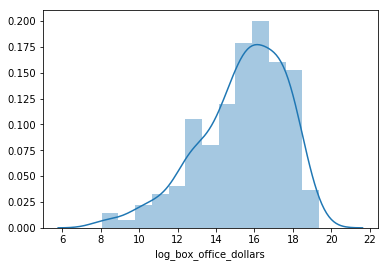

In [61]:
sns.distplot(biopics['log_box_office_dollars'])

Let's take a look at the (log) box_office_dollars according to whether
the subject of the biopic was a person of color or not:

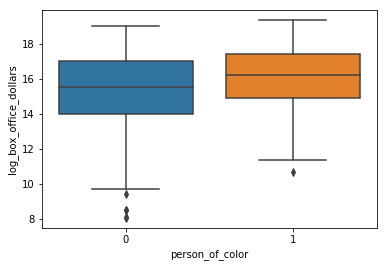

In [62]:
sns.boxplot("person_of_color",y="log_box_office_dollars",data=biopics)

### Q4: Does it look like there's a difference between the two groups?

It doesn't look like there's too much of a difference. You might be able to say some movies without a person of color had a higher minimum box office income.

### End Q4

## The t-test

To test of there's a statistically significant difference between two means, we
can use the independent sample t-test.  First, load up the right package:

In [63]:
from scipy.stats import ttest_ind

It's more readable if we split the data into two samples:

In [64]:
poc = biopics[biopics["person_of_color"] == 1]
not_poc = biopics[biopics["person_of_color" ] == 0]

In [65]:
ttest_ind(poc["log_box_office_dollars"],not_poc["log_box_office_dollars"])

Ttest_indResult(statistic=2.1155676498398988, pvalue=0.03516867248056494)


### Q5: What do those results mean?

The p value is below 0.05, so there is still a low chance that this happened by chance, so there appears to be a significant difference between the two. So I was wrong above, never trust a graph.

### End Q5

## ANOVA
Ok, that's pretty straight-forward.  Let's look at a more complex problem:

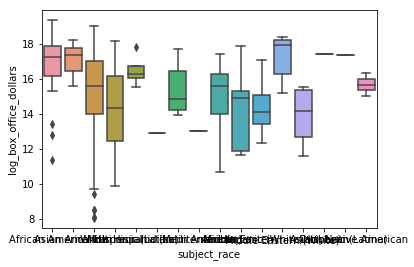

In [66]:
sns.boxplot("subject_race",y="log_box_office_dollars",data=biopics)

Without getting too worred about the fact that the axes are unreadable, it looks like
there are some differences between the different groups.  But are they real?

Let's start with an ANOVA:

In [67]:
box_office_dollars_lm = ols('log_box_office_dollars ~ subject_race', data=biopics).fit()
table = sm.stats.anova_lm(box_office_dollars_lm, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table

,sum_sq,df,F,PR(>F)
subject_race,182.134523,15.0,2.550334,0.001365
Residual,1428.318701,300.0,NaN,NaN


### Q6: Is there a statistically significant difference?

PR(>F) is less than 0.05, so they are significantly different, so there is an effect of subject race on box office dollars.

### End Q6

Let's apply Tukey's HSD using the same model and see what we get.

### Q7: Write code to use Tukey's HSD test on the subject_race variable and interpret the results.

In [70]:
# Insert your code here - looking to see which values of race are different from each other
res3 = pairwise_tukeyhsd(biopics['log_box_office_dollars'], biopics['subject_race'])
res3.summary()

group1,group2,meandiff,lower,upper,reject
African,African American,1.9884,-1.167,5.1437,False
African,Asian,-1.0387,-5.7648,3.6874,False
African,Asian American,2.1526,-3.0507,7.3558,False
African,Caribbean,2.517,-5.5439,10.5778,False
African,Hispanic (Latin American),0.4535,-3.2624,4.1694,False
African,Hispanic (Latina),2.4782,-5.5827,10.5391,False
African,Hispanic (Latino),1.5807,-3.1454,6.3068,False
African,Hispanic (White),-0.4918,-5.2179,4.2343,False
African,Indian,-2.0048,-10.0657,6.056,False
African,Mediterranean,-1.896,-9.9568,6.1649,False


The only races that seem to NOT be significantly different are African American and Multi racial, and African American and White.

In [73]:
sorted(list(biopics['subject_race'].unique()))
# helps us see which is the intercept below

['African',
 'African American',
 'Asian',
 'Asian American',
 'Caribbean',
 'Hispanic (Latin American)',
 'Hispanic (Latina)',
 'Hispanic (Latino)',
 'Hispanic (White)',
 'Indian',
 'Mediterranean',
 'Middle Eastern',
 'Middle Eastern (White)',
 'Multi racial',
 'Native American',
 'White']

In [74]:
box_office_dollars_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_box_office_dollars   R-squared:                       0.113
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     2.550
Date:                    Tue, 01 Oct 2019   Prob (F-statistic):            0.00137
Time:                            13:40:59   Log-Likelihood:                -686.73
No. Observations:                     316   AIC:                             1405.
Df Residuals:                         300   BIC:                             1466.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    14.9040      0.825     18.072      0.000      13.281      16.527
subject_race[T.African American]              1.9884      0.913      2.178      0.030       0.191       3.785
subject_race[T.Asian]                        -1.0387      1.368     -0.759      0.448      -3.730       1.653
subject_race[T.Asian American]                2.1526      1.506      1.430      0.154      -0.811       5.116
subject_race[T.Caribbean]                     2.5170      2.333      1.079      0.281      -2.073       7.107
subject_race[T.Hispanic (Latin American)]     0.4535      1.075      0.422      0.674      -1.663       2.570
subject_race[T.Hispanic (Latina)]             2.4782      2.333      1.062      0.289      -2.112       7.069
subject_race[T.Hispanic (Latino)]             1.5807      1.368      1.156      0.249      -1.111       4.272
subject_race[T.Hispanic (White)]             -0.4918      1.368     -0.360      0.719      -3.183       2.200
subject_race[T.Indian]                       -2.0048      2.333     -0.859      0.391      -6.595       2.586
subject_race[T.Mediterranean]                -1.8960      2.333     -0.813      0.417      -6.486       2.694
subject_race[T.Middle Eastern]               -0.5770      1.278     -0.452      0.652      -3.091       1.937
subject_race[T.Middle Eastern (White)]        2.4058      1.129      2.130      0.034       0.183       4.628
subject_race[T.Multi racial]                 -0.6936      0.989     -0.701      0.484      -2.639       1.252
subject_race[T.Native American]               0.7853      1.749      0.449      0.654      -2.658       4.228
subject_race[T.White]                         0.3095      0.838      0.369      0.712      -1.339       1.958
==============================================================================
Omnibus:                       34.456   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.793
Skew:                          -0.826   Prob(JB):                     5.10e-10
Kurtosis:                       3.723   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### End Q7

# <font color="green">END OF NOTEBOOK</font>
## Remember to submit the HTML version of this notebook via Canvas.